# Stock Pricing Data

In this chapter we will take a look at how to load stock pricing data. 

Then we will adjust the open, high, low and close price and create a datastore to store the data for later use. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.pylabtools import figsize
figsize(12.5, 5)


import matplotlib.pyplot as plt
import warnings
#plt.style.use('dark_background')
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
from pandas.tseries.offsets import BDay
import yfinance as yf
from yahoofinancials import YahooFinancials

In [2]:
tsla_df = yf.download('BLK', start='2019-01-01', 
                      end='2019-12-31', progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,389.149994,393.850006,385.850006,392.820007,371.712189,612300
2019-01-02,386.279999,391.160004,385.100006,389.420013,368.494873,926800
2019-01-03,385.029999,386.549988,377.279999,377.980011,357.669617,781000
2019-01-04,385.170013,392.929993,381.989990,391.820007,370.765961,647800
2019-01-07,390.940002,398.179993,389.420013,392.910004,371.797333,714500


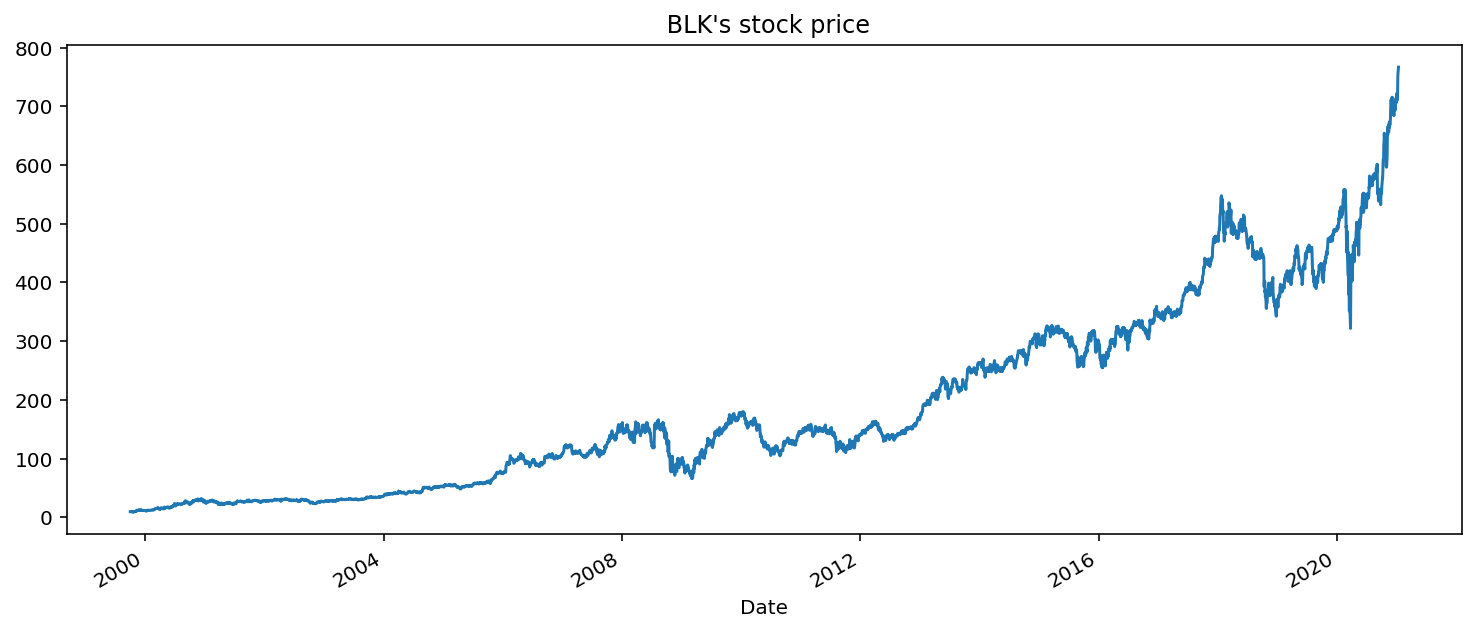

In [3]:
ticker = yf.Ticker('BLK')

tsla_df = ticker.history(period="max")

tsla_df['Close'].plot(title=" BLK's stock price");

## Weekly Data and Stock Quote Data

In [4]:
yahoo_financials = YahooFinancials('BLK')

data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2021-01-04', 
                                                  time_interval='weekly')

tsla_df = pd.DataFrame(data['BLK']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2000-01-01,17.5000,15.000,17.4375,15.8750,260500.0,10.613274
2000-01-08,17.7500,16.000,16.5000,17.5000,404100.0,11.699664
2000-01-15,18.3750,17.250,17.7500,17.3750,170000.0,11.616104
2000-01-22,18.0000,17.000,17.5000,17.3750,84000.0,11.616104
2000-01-29,18.5625,17.125,17.1250,18.4375,248700.0,12.326431


In [5]:
yahoo_financials.get_stock_quote_type_data()

{'BLK': {'exchange': 'NYQ',
  'shortName': 'BlackRock, Inc.',
  'longName': 'BlackRock, Inc.',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EST',
  'isEsgPopulated': False,
  'gmtOffSetMilliseconds': '-18000000',
  'quoteType': 'EQUITY',
  'symbol': 'BLK',
  'messageBoardId': 'finmb_403413',
  'market': 'us_market'}}

In [6]:
yahoo_financials.get_key_statistics_data()

{'BLK': {'annualHoldingsTurnover': None,
  'enterpriseToRevenue': 7.689,
  'beta3Year': None,
  'profitMargins': 0.29833,
  'enterpriseToEbitda': 20.437,
  '52WeekChange': 0.4791634,
  'morningStarRiskRating': None,
  'forwardEps': 36.12,
  'revenueQuarterlyGrowth': None,
  'sharesOutstanding': 152511008,
  'fundInceptionDate': '-',
  'annualReportExpenseRatio': None,
  'totalAssets': None,
  'bookValue': 222.123,
  'sharesShort': 1526714,
  'sharesPercentSharesOut': 0.01,
  'fundFamily': None,
  'lastFiscalYearEnd': 1577750400,
  'heldPercentInstitutions': 0.8746,
  'netIncomeToCommon': 4685000192,
  'trailingEps': 30.111,
  'lastDividendValue': 3.63,
  'SandP52WeekChange': 0.15730631,
  'priceToBook': 3.451601,
  'heldPercentInsiders': 0.01222,
  'nextFiscalYearEnd': 1640908800,
  'yield': None,
  'mostRecentQuarter': 1601424000,
  'shortRatio': 2.69,
  'sharesShortPreviousMonthDate': '2020-11-13',
  'floatShares': 150607373,
  'beta': 1.177521,
  'enterpriseValue': 120742035456,
  '

In [12]:
yahoo_financials.get_summary_data()

{'BLK': {'previousClose': 750.42,
  'regularMarketOpen': 757.15,
  'twoHundredDayAverage': 618.2785,
  'trailingAnnualDividendYield': 0.018909412,
  'payoutRatio': 0.4714,
  'volume24Hr': None,
  'regularMarketDayHigh': 759.3664,
  'navPrice': None,
  'averageDailyVolume10Day': 571016,
  'totalAssets': None,
  'regularMarketPreviousClose': 750.42,
  'fiftyDayAverage': 708.5325,
  'trailingAnnualDividendRate': 14.19,
  'open': 757.15,
  'toCurrency': None,
  'averageVolume10days': 571016,
  'expireDate': '-',
  'yield': None,
  'algorithm': None,
  'dividendRate': 14.52,
  'exDividendDate': '2020-12-03',
  'beta': 1.177521,
  'circulatingSupply': None,
  'startDate': '-',
  'regularMarketDayLow': 747.42,
  'priceHint': 2,
  'currency': 'USD',
  'trailingPE': 25.12205,
  'regularMarketVolume': 603068,
  'lastMarket': None,
  'maxSupply': None,
  'openInterest': None,
  'marketCap': 115366952960,
  'volumeAllCurrencies': None,
  'strikePrice': None,
  'averageVolume': 603872,
  'priceToSa

In [7]:
yahoo_financials.get_stock_earnings_data()

{'BLK': {'earningsData': {'quarterly': [{'date': '4Q2019',
     'actual': 8.34,
     'estimate': 7.69},
    {'date': '1Q2020', 'actual': 6.6, 'estimate': 6.36},
    {'date': '2Q2020', 'actual': 7.85, 'estimate': 6.99},
    {'date': '3Q2020', 'actual': 9.22, 'estimate': 7.8}],
   'currentQuarterEstimate': 8.87,
   'currentQuarterEstimateDate': '4Q',
   'currentQuarterEstimateYear': 2020,
   'earningsDate': [{'raw': 1610582400, 'fmt': '2021-01-14'}]},
  'financialsData': {'yearly': [{'date': 2016,
     'revenue': 12261000000,
     'earnings': 3168000000},
    {'date': 2017, 'revenue': 13600000000, 'earnings': 4952000000},
    {'date': 2018, 'revenue': 14198000000, 'earnings': 4305000000},
    {'date': 2019, 'revenue': 14539000000, 'earnings': 4476000000}],
   'quarterly': [{'date': '4Q2019',
     'revenue': 3977000000,
     'earnings': 1301000000},
    {'date': '1Q2020', 'revenue': 3710000000, 'earnings': 806000000},
    {'date': '2Q2020', 'revenue': 3648000000, 'earnings': 1214000000},


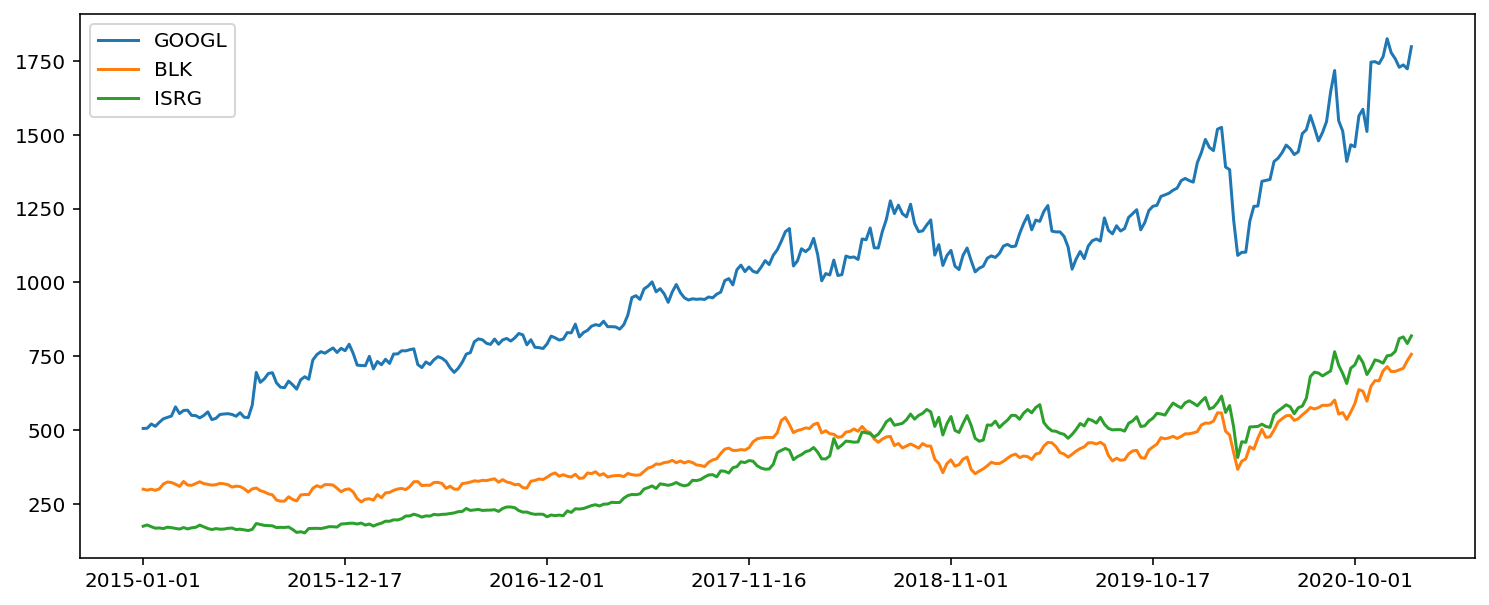

In [10]:
import datetime as dt
#from datetime import datetime
from datetime import datetime, timedelta 
date = dt.datetime.now()
modified_date = date - timedelta(days=1)
end = dt.datetime.strftime(modified_date, "%Y-%m-%d")

assets = ['GOOGL', 'BLK', 'ISRG']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2015-01-01', 
                                                  end_date=end, 
                                                  time_interval='weekly')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

prices_df.plot()


## Trading Portfolio

with adjusted ohlc data

In [11]:
import sys
sys.path.insert(0, '../scripts/')

import numpy as np

import utilities as ut
from utilities import clean_ticker
from utilities import clean_tickers
from utilities import adjust

In [12]:
_portfolio_data = '../data/portfolio_data/'

In [13]:
def _adjust_stock_data(symbols, hdf_name):
    
    end = pd.datetime.today().date()
    start = end - 252 * BDay() * 20
    
    prices_hdf = pd.HDFStore(_portfolio_data + 'hdf/'+hdf_name+'.h5')
    
    symbol_count = len(symbols)
    N = symbol_count
    missing_symbols = []
    for i, sym in enumerate(symbols, start=1):
        if not pd.isnull(sym):
            try:
                df = yf.download(sym, start=start, end=end, progress=False)
                df.index = pd.to_datetime(df.index)
                df['adj open'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['Open'], rounding=4)
                df['adj high'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['High'], rounding=4)
                df['adj low'] = np.vectorize(adjust)(df.index, df['Close'], df['Adj Close'], df['Low'], rounding=4)
                ohlc = df[['adj open', 'adj high', 'adj low', 'Adj Close', 'Volume']]
                ohlc.columns = ['Open','High','Low','Close', 'Volume']
                ohlc.to_excel(_portfolio_data+'xlsx/'+sym+'.xlsx')
                prices_hdf[clean_ticker(sym)] = ohlc
                
            except Exception as e:
                print(e, sym)
                missing_symbols.append(sym)
            N -= 1
            pct_total_left = (N / symbol_count)
            print('{}..[done] | {} of {} symbols collected | {:>.2%}'.format(\
                                                            sym, i, symbol_count, pct_total_left))
    prices_hdf.close()        
    return missing_symbols

list of symbols in portfolio

In [14]:
symbols = ['GOOGL', 'BLK', 'MSFT', 'AMD', 'ISRG', 'GOLD', 'AAPL', 'V', 'TSM', 'DPW.DE', 'DB1.DE', 'N4G.DE']

adjust ohlc data and save the data in a datastore

In [15]:
_missing = _adjust_stock_data(symbols, "portfolio")

GOOGL..[done] | 1 of 12 symbols collected | 91.67%
BLK..[done] | 2 of 12 symbols collected | 83.33%
MSFT..[done] | 3 of 12 symbols collected | 75.00%
AMD..[done] | 4 of 12 symbols collected | 66.67%
ISRG..[done] | 5 of 12 symbols collected | 58.33%
GOLD..[done] | 6 of 12 symbols collected | 50.00%
AAPL..[done] | 7 of 12 symbols collected | 41.67%
V..[done] | 8 of 12 symbols collected | 33.33%
TSM..[done] | 9 of 12 symbols collected | 25.00%
DPW.DE..[done] | 10 of 12 symbols collected | 16.67%
DB1.DE..[done] | 11 of 12 symbols collected | 8.33%
N4G.DE..[done] | 12 of 12 symbols collected | 0.00%
